In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

<h3>Dealing with PMB Files</h3>

In [2]:
f = open("J.pbm", "r")

In [3]:
for each in f:
    print (each)
    
#LESSGOOOOO, so python can use regular file handling processes to read proper PBM's

P1

# J

6 10

0 0 0 0 1 0

0 0 0 0 1 0

0 0 0 0 1 0

0 0 0 0 1 0

0 0 0 0 1 0

0 0 0 0 1 0

1 0 0 0 1 0

0 1 1 1 0 0

0 0 0 0 0 0

0 0 0 0 0 0


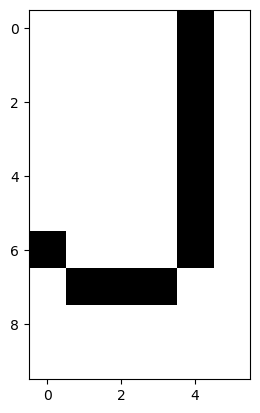

In [4]:
import matplotlib.image as img

testImage = img.imread('J.pbm')
plt.imshow(testImage)

#Doubt -- what is going on with the shape and what is printed whren we imread


<h2>Modifying the image as per the hopfield network</h2>

In [5]:
print(f.read()) #you cant do this after you've already read, since by then the pointer will go to the end of the file

In [6]:
f.seek(12) #this takes the file pointer to the start of the binary values, so they can be editable
print(f.read())

0 0 0 0 1 0
0 0 0 0 1 0
0 0 0 0 1 0
0 0 0 0 1 0
0 0 0 0 1 0
0 0 0 0 1 0
1 0 0 0 1 0
0 1 1 1 0 0
0 0 0 0 0 0
0 0 0 0 0 0


In [7]:
f.seek(0)
data = f.read()
data = data.replace('0', '1')

In [8]:
with open(r'SampleFile.txt', 'w') as file:
   file.write(data)

#That worked. We now have a file with all 0's replaced with 1's. But is that what we wanted?

In [9]:
f.seek(12)
string = f.read()
#print(string)
delimiters = [" ", "\n"]

for delimiter in delimiters:
    string = " ".join(string.split(delimiter))

result = string.split()
 
print(result)

#this gives us the file in the form of a list

['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


In [10]:
defaultstr = "P1\n#J\n6 10\n"

In [11]:
print(defaultstr)

P1
#J
6 10



In [12]:
with open(r'SampleFile2.pbm', 'a') as file:
   file.write(defaultstr)
   for i in range(0, len(result)):
    file.write(result[i])
    file.write(' ')
    if((i+1)%6 == 0):
        file.write('\n')

#this will write the current state of the file into a new file. The file can then be displayed.

In [13]:
# testImage = img.imread('SampleFile2.pbm')
# plt.imshow(testImage)


In [14]:
x1 = np.array(result)

x1

array(['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0'], dtype='<U1')

In [15]:
x1 = x1.astype(int)

In [16]:
x2 = x1.reshape(60,1)

In [17]:
x2.shape

(60, 1)

In [18]:
arr2 = x2@x2.T

# with np.printoptions(threshold=np.inf):
#     print(arr2)

arr2.shape # we have multiplied the two image matrices fully to get the weight matrix
#However,this is still partially incorrect as we are using a binary system (0,1) rather than a bipolar system(1,-1)

(60, 60)

In [19]:
result2 = result
result2

['0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [20]:
for i in range(0, len(result2)):
    if(result2[i] == '0'):
        result2[i] = '-1'

In [21]:
x3 = np.array(result2)

In [22]:
x3 = x3.astype(int)

In [23]:
x3 = x3.reshape(60,1)

In [24]:
arr3 = x3@x3.T
arr3.shape


(60, 60)

In [25]:
# with np.printoptions(threshold=np.inf):
#     print(arr3)

for i in range (0, len(arr3)):
    for j in range(0, len(arr3[i])):
        if(i == j):
            arr3[i][j] = 0

In [26]:
with np.printoptions(threshold=np.inf):
    print(arr3) 
#Thus we have trained our hopfield network on J.
#How do we test??

[[ 0  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
   1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  0  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
   1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  0  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
   1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  0 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
   1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1
  -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1 -1  0  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 

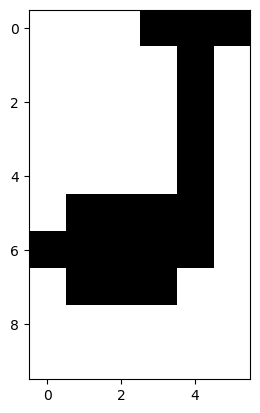

In [27]:
testImage = img.imread('clef.pbm')
plt.imshow(testImage)
    
    #this will be our testing image. We shall test this for convergence to the given j. Lessgoooo

In [28]:
#Updating them all at once

f2 = open('bridge.pbm', 'r+')

In [29]:
f2.seek(12)
#Update this part of the code to make it non plag
string = f2.read()
#print(string)
delimiters = [" ", "\n"]

for delimiter in delimiters:
    string = " ".join(string.split(delimiter))

result = string.split()
 
print(result)

['1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


In [30]:
with open(r'UpdateFile1.pbm', 'a') as file:
   file.write(defaultstr)
   for i in range(0, len(result)):
    file.write(result[i])
    file.write(' ')
    if((i+1)%6 == 0):
        file.write('\n')

In [31]:
for i in range(0, len(result)):
    if(result[i] == '0'):
        result[i] = '-1'

In [32]:
result = np.array(result)
result = result.astype(int)

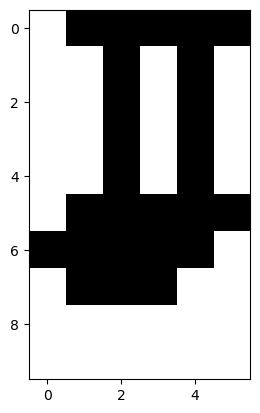

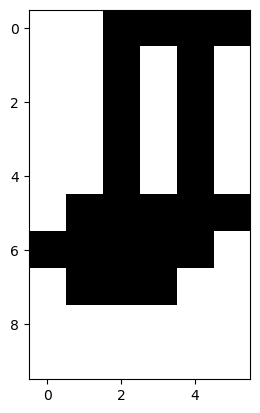

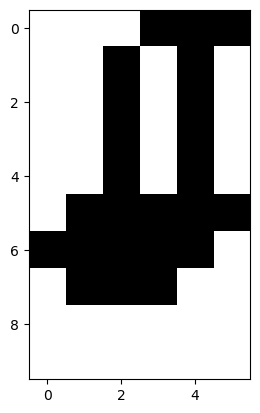

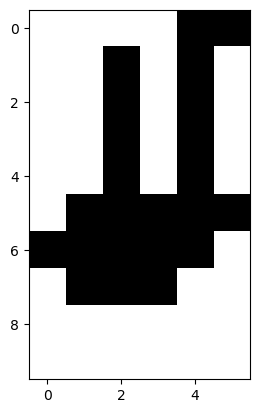

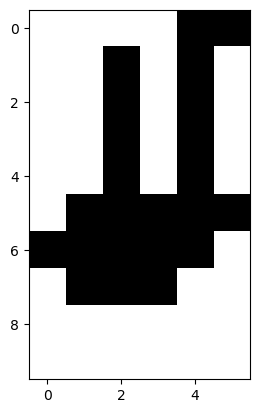

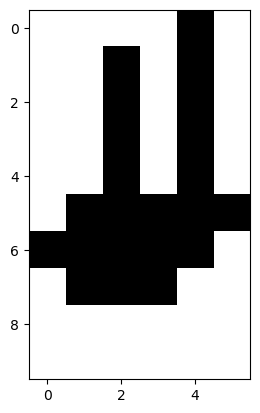

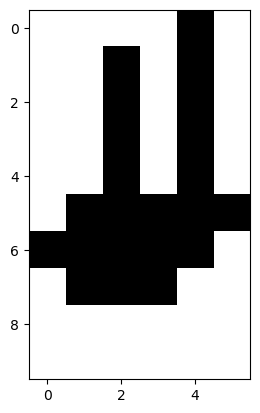

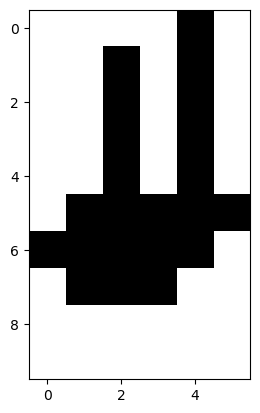

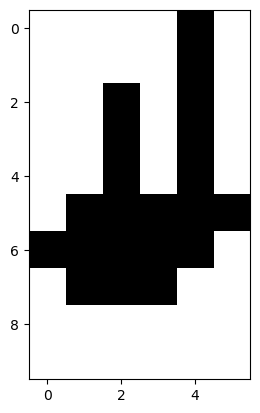

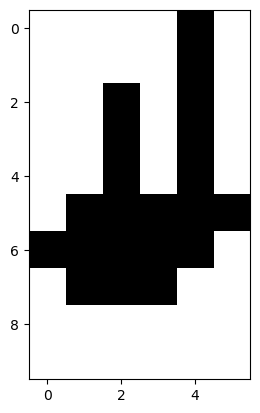

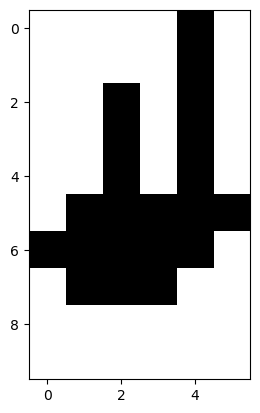

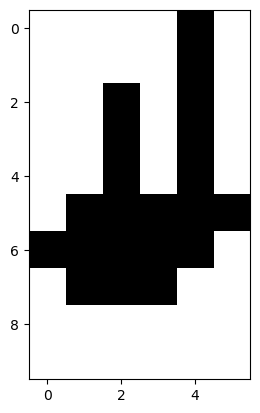

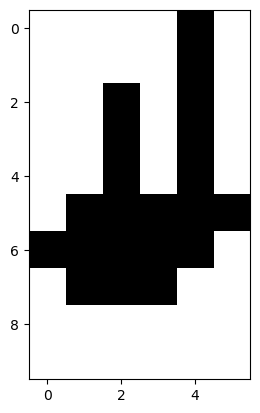

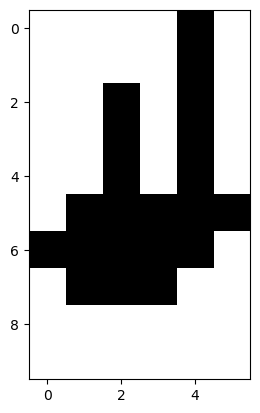

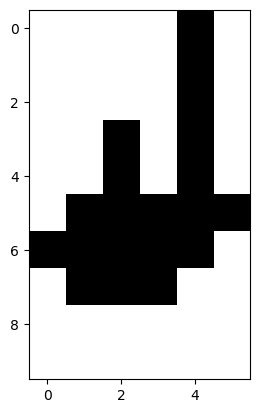

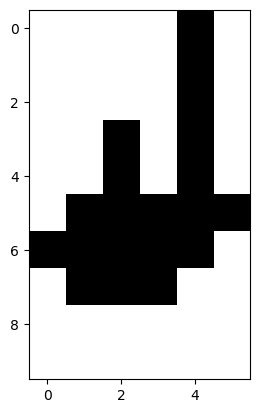

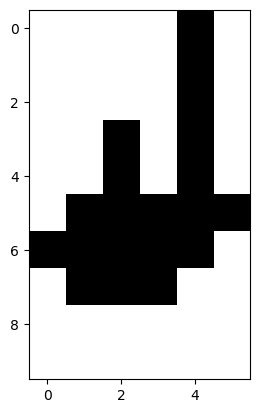

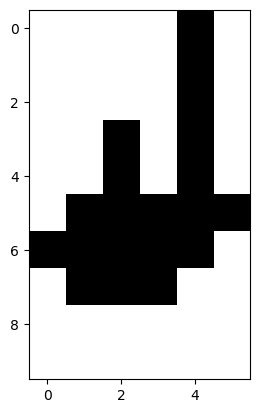

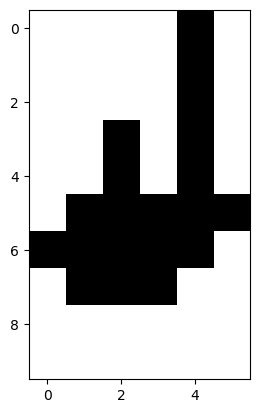

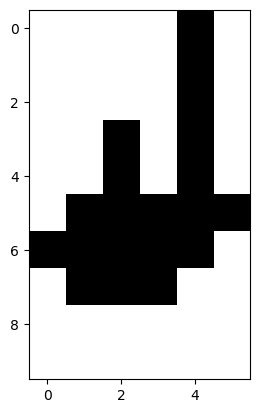

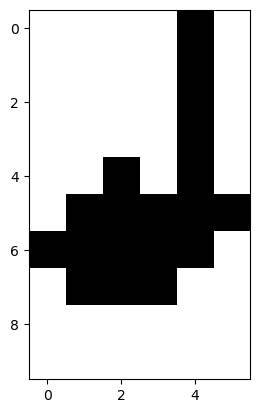

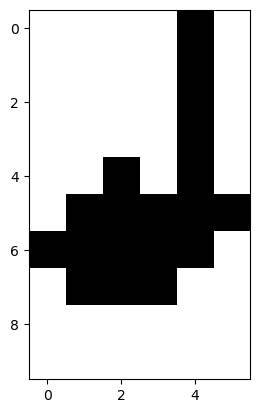

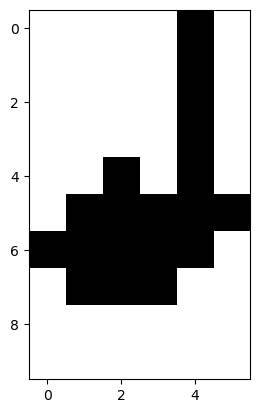

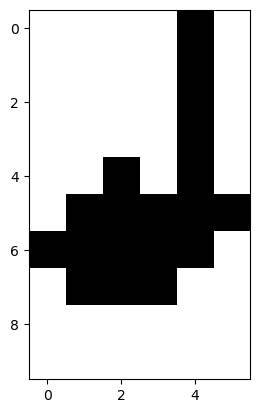

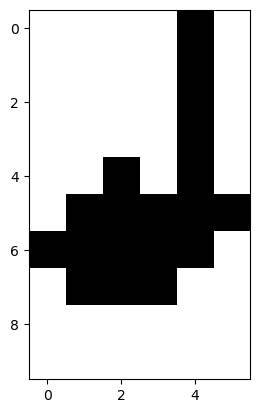

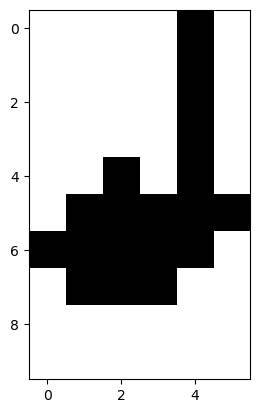

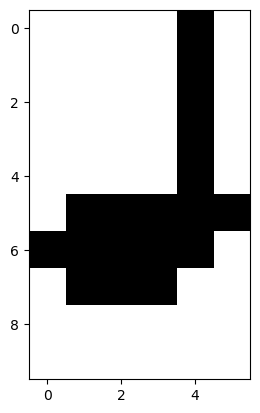

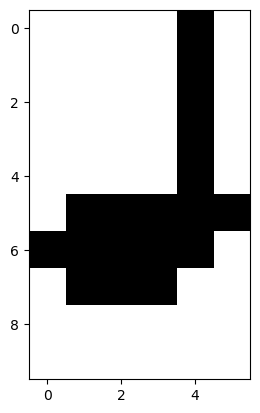

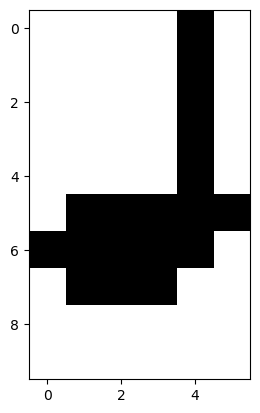

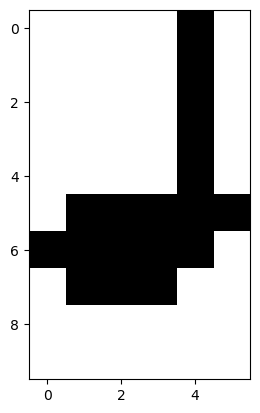

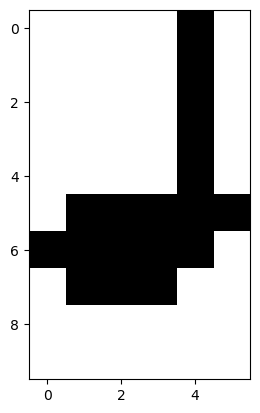

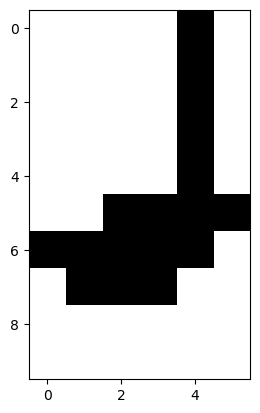

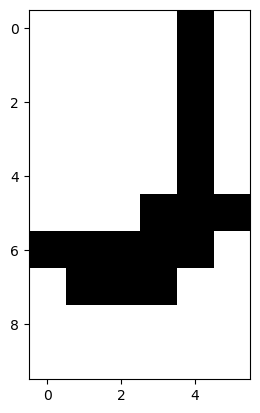

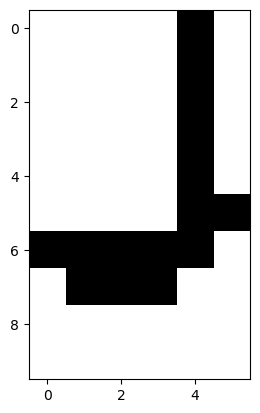

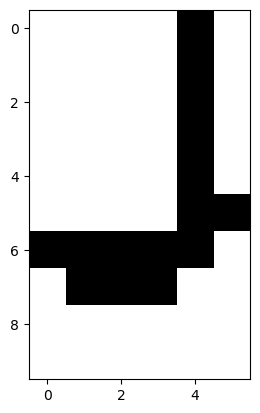

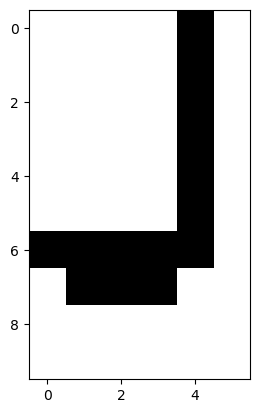

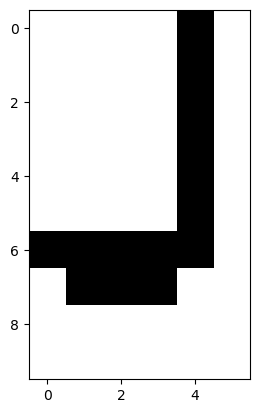

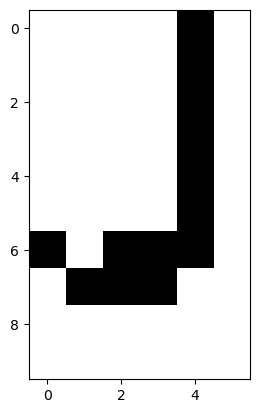

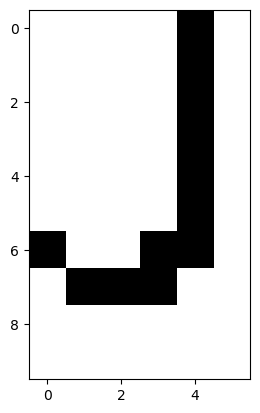

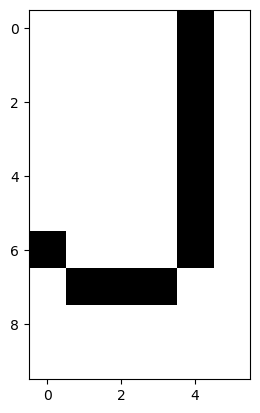

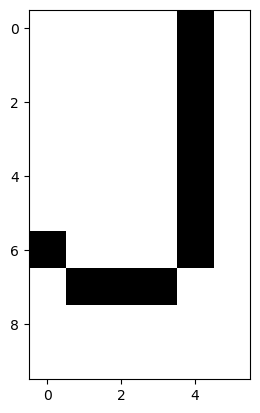

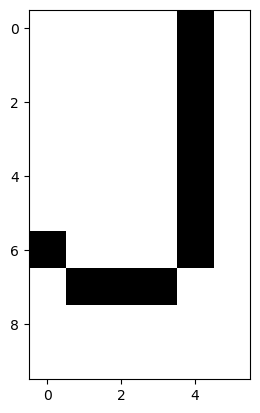

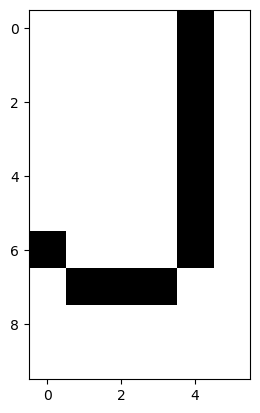

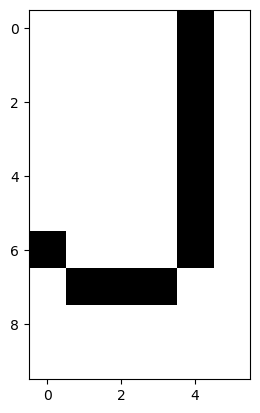

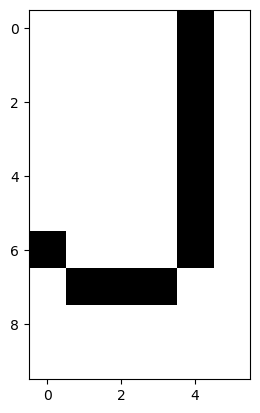

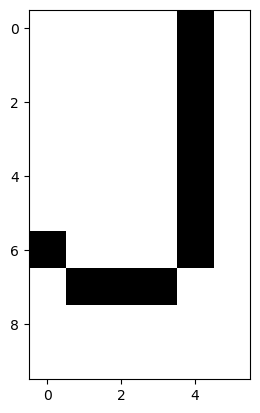

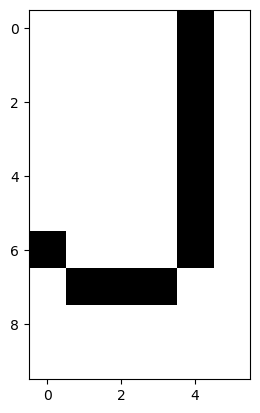

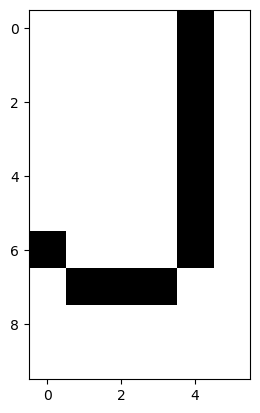

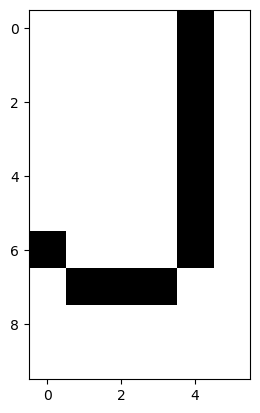

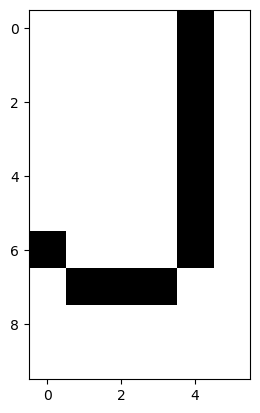

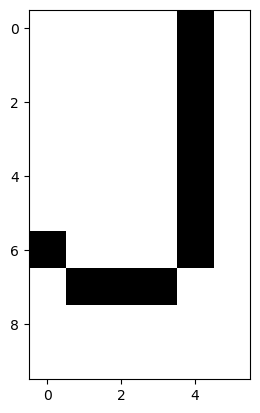

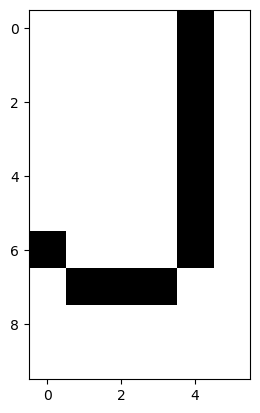

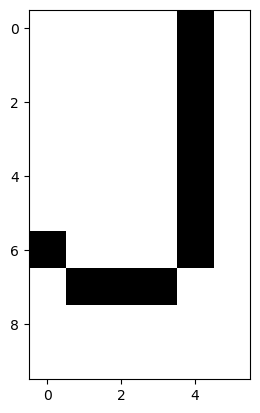

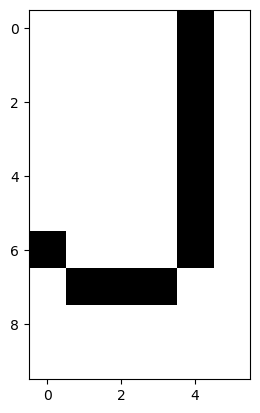

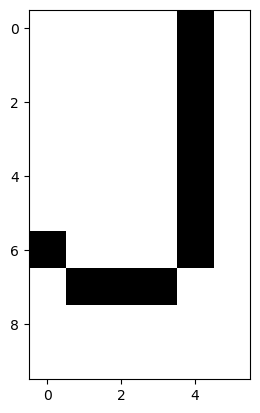

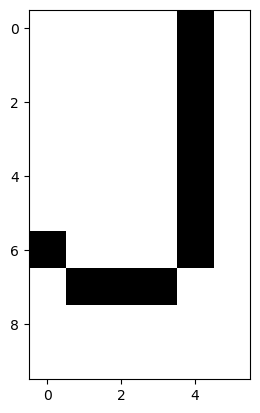

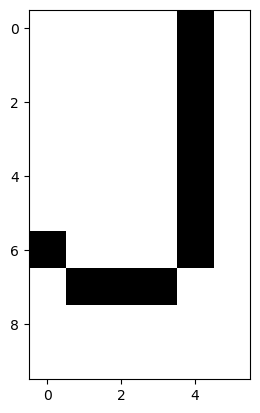

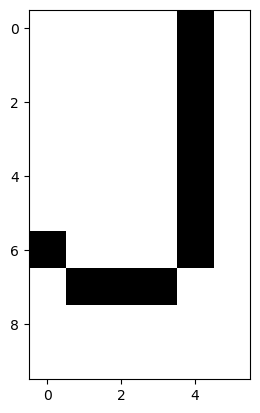

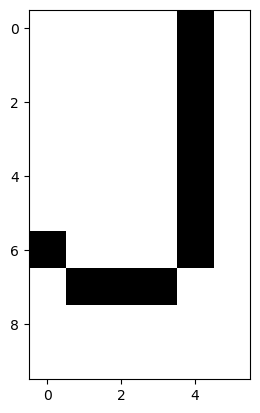

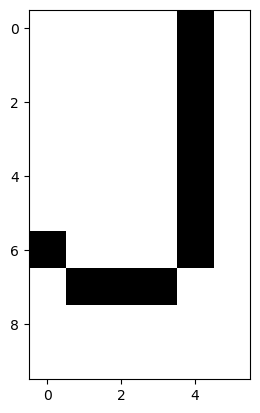

In [33]:
for i in range(0,len(result)):
    activation = 0
    for j in range(0, len(result)):
        activation += arr3[i][j] * result[j]
    if (activation > 0):
        result[i] = 1
    else:
        result[i] = -1
    with open(r'UpdateFile1.pbm', 'w') as file:
       file.write(defaultstr)
       for i in range(0, len(result)):
        if(result[i] == 1):
           file.write(str(result[i]))
        else:
            file.write('0')
        file.write(' ')
        if((i+1)%6 == 0):
            file.write('\n')
            
    testImage = img.imread('UpdateFile1.pbm')
    plt.imshow(testImage)
    plt.show()
    
#CONVERGED!

#How to check for convergence? Multiple iterations with no change

In [ ]:
##PROBABILITY CORRUPTION

